In [15]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
import xarray as xr

import numpy as np
import metpy
import metpy.calc as mpcalc
from metpy.plots import ctables
from metpy.cbook import get_test_data
from metpy.units import units
import os
import scipy.integrate as integrate
import datetime as dt
import glob
import json
from datetime import datetime
from datetime import timedelta

from matplotlib.colors import Normalize
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm

#import wrf
import scipy
#import xcape

import Magics.macro as magics
import cdsapi

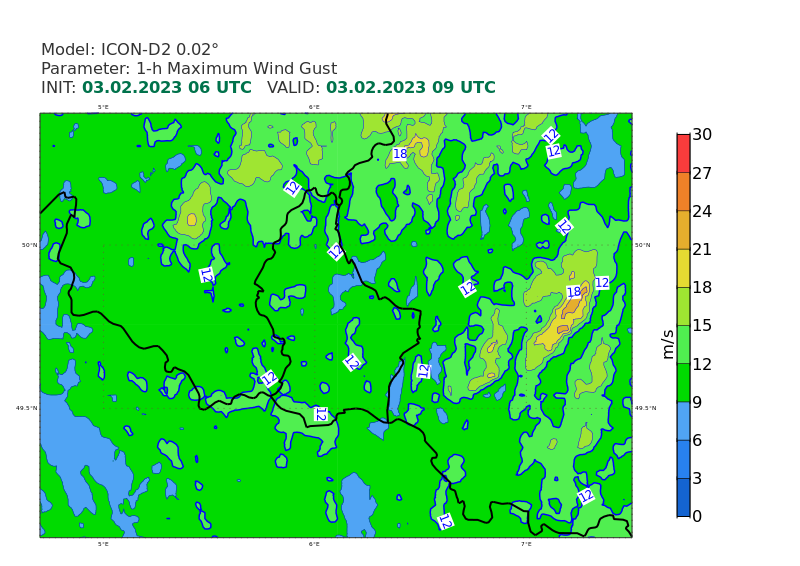

In [18]:
coast = magics.mcoast(
    map_boundaries                  = "on",
    map_boundaries_colour           = "black",
    map_boundaries_thickness        = 4,
    map_coastline_resolution        = "high",
    map_coastline_colour            = "tan",
    map_coastline_land_shade        = "off",    
    map_coastline_land_shade_colour = "cream",
    map_grid                        = "on",
    map_grid_line_style             = "dot",
    map_grid_colour                 = "tan",  
    map_grid_latitude_reference     = 0.00,
    map_grid_latitude_increment     = 0.5,
    map_grid_longitude_increment    = 1.00,
    map_rivers                      = "off"
)


# projection = magics.mmap(
#     subpage_map_library_area = "on",
#     subpage_map_area_name    = 'central_europe',
#     page_id_line             = "off"
# )


projection = magics.mmap(
                  subpage_lower_left_latitude   = 49.1,
                  subpage_lower_left_longitude  = 4.7,
                  subpage_upper_right_latitude  = 50.4, 
                  subpage_upper_right_longitude = 7.5, 
                  subpage_map_projection        = "mercator",
                  page_id_line                  = "off")

legend = magics.mlegend(legend_display_type   = 'continuous')

msl_cont = magics.mcont( 
    contour                        = "off",
    contour_level_selection_type   = "interval",
    contour_interval               = 2.00,
    contour_shade                  = "on",
    contour_shade_method           = "area_fill",
    contour_shade_min_level        = 0,
    contour_shade_max_level        = 30,
    contour_shade_colour_method    = "calculate",
    contour_shade_colour_direction = "clockwise",
    contour_highlight              = "off",
    contour_label                  = "off",
    contour_shade_max_level_colour = "red",
    contour_shade_min_level_colour = "blue",
    legend                         = "on"
)

contour = magics.mcont(
    legend                       = 'on',
    contour                      = 'on',
    contour_shade                = 'on',
    contour_label                = 'on',
    contour_label_height         = 0.5,
    contour_level_selection_type = 'interval',
    contour_interval             = 3.0,
    contour_shade_min_level      = 0,
    contour_shade_max_level      = 30,
    contour_shade_method         = 'area_fill',
    contour_shade_palette_name   = 'eccharts_blue_green_red_11',
    contour_shade_colour_method  = 'palette'
)

legend = magics.mlegend(
    legend_display_type       = "continuous",
    legend_automatic_position = "right",
    legend_title              = "on",
    legend_title_text         = "m/s",
    legend_text_font_size     = "0.7",
    legend_text_colour        = "black",
    legend_label_frequency    = 1)


os.chdir('/data/icond2')

data = magics.mgrib(
    grib_input_file_name = "icond2_vmax_new.grib2",
    grib_field_position  = 3)

title = magics.mtext( 
    text_lines          = ["Model: ICON-D2 0.02°",
                           "Parameter: 1-h Maximum Wind Gust",
                           "INIT: <font colour='evergreen' style='bold'><grib_info key='base-date' format='%d.%m.%Y %H UTC'/></font>   VALID: <font colour='evergreen' style='bold'><grib_info key='valid-date' format='%d.%m.%Y %H UTC'/></font>"],
    text_justification  = 'left',
    text_font_size      = 0.7,
    text_mode           = "automatic",
    text_colour         = "charcoal")

output = magics.output(
    output_formats                = ['png'],
    output_name                   = 'size',
    output_name_first_page_number = 'off',
    output_width = 900)

#magics.plot(output, projection, data, contour, coast, legend, title)
magics.plot(projection, data, contour, coast, legend, title)

In [19]:
top_left = magics.page(
    layout          = 'positional', 
    page_x_length   = 15.5,
    page_y_length   = 15.,
    page_frame      = 'on',
    page_id_line    = 'off',
    page_x_position = 0.,
    page_y_position = 14.5,
    super_page_x_length = 31.00,
    super_page_y_length = 30.00)

top_right = magics.page(
    page_frame         = 'off',
    layout             = 'positional',
    page_x_length      = 15.,
    page_y_length      = 15.,
    page_id_line       = 'off',
    page_x_position    = 14.7,
    page_y_position    = 14.
        )

bottom_right = magics.page(  
    page_frame         = 'off',
    layout             = 'positional',
    page_x_length      = 15.,
    page_y_length      = 15.,
    page_id_line       = 'off',
    page_x_position    = 14.7,
    page_y_position    = 0.5
        )

bottom_left = magics.page( 
    page_frame         = 'off',
    layout             = 'positional',
    page_x_length      = 15.,
    page_y_length      = 15.,
    page_id_line       = 'off',
    page_x_position    = 0.,
    page_y_position    = 0.5
        )

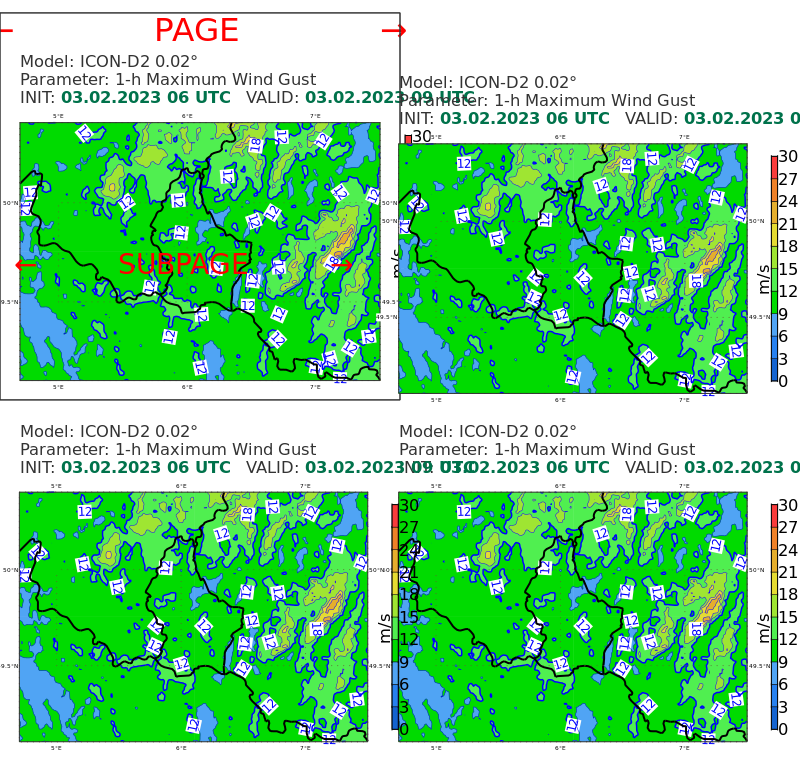

In [20]:
additional_text_page = magics.mtext(
    text_lines = ["←              PAGE              →"],
    text_colour         = "red",
    text_font_size      = 1.4,
    text_mode           = "positional",
    text_box_x_position = 3.75,
    text_box_y_position = 13.50)

additional_text_subpage = magics.mtext(
    text_lines = ["←         SUBPAGE         →"],
    text_colour = "red",
    text_font_size = 1.2,
    text_mode           = "positional",
    text_box_x_position = 3.25,
    text_box_y_position = 4.50)

magics.plot(top_left, projection, data, contour, coast, legend, title,  
            additional_text_subpage, additional_text_page,
            bottom_right, projection, data, contour, coast, legend, title,
            bottom_left, projection, data, contour, coast, legend, title,
            top_right, projection, data, contour, coast, legend, title)